In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor #regression library
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

LONDON_DATA_FILE_GROUPED_TIMESERIES= 'house_prices_london_grouped_timeseries.csv'

In [26]:
df = pd.read_csv(LONDON_DATA_FILE_GROUPED_TIMESERIES, header=0)

In [27]:
df.dtypes

Sold Price               float64
Postcode_short            object
Sold Year                  int64
Type                      object
Sold Price prev year     float64
Sold Price prev year2    float64
Sold Price prev year3    float64
dtype: object

In [28]:
df.dropna(subset=['Type'], inplace=True)
dummy_df = pd.get_dummies(df['Type'])
df = pd.concat([df, dummy_df], axis=1)
df.drop('Type', axis=1, inplace=True)

In [29]:
df.head()

,Sold Price,Postcode_short,Sold Year,Sold Price prev year,Sold Price prev year2,Sold Price prev year3,D,F,O,S,T
0,108500.0,E1,1995,NaN,NaN,NaN,1,0,0,0,0
1,57995.0,E1,1995,NaN,NaN,NaN,0,1,0,0,0
2,77000.0,E1,1995,NaN,NaN,NaN,0,0,0,1,0
3,81000.0,E1,1995,NaN,NaN,NaN,0,0,0,0,1
4,63950.0,E1,1996,57995.0,NaN,NaN,0,1,0,0,0


In [30]:
#df.dropna(subset=['Postcode_short'], inplace=True)
dummy_df = pd.get_dummies(df['Postcode_short'])
df = pd.concat([df, dummy_df], axis=1)
df.drop('Postcode_short', axis=1, inplace=True)

In [31]:
df.head()

,Sold Price,Sold Year,Sold Price prev year,Sold Price prev year2,Sold Price prev year3,D,F,O,S,T,...,WC1N,WC1R,WC1V,WC1X,WC2A,WC2B,WC2E,WC2H,WC2N,WC2R
0,108500.0,1995,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57995.0,1995,NaN,NaN,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,77000.0,1995,NaN,NaN,NaN,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,81000.0,1995,NaN,NaN,NaN,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,63950.0,1996,57995.0,NaN,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
final_df=df[df['Sold Year']>=1998] #data prior to this has Nan

In [33]:
final_df.shape

(11583, 200)

In [34]:
final_df=final_df.dropna() #drop all rows with Nan

In [35]:
final_df.shape

(10121, 200)

In [36]:
final_df.head(5)

,Sold Price,Sold Year,Sold Price prev year,Sold Price prev year2,Sold Price prev year3,D,F,O,S,T,...,WC1N,WC1R,WC1V,WC1X,WC2A,WC2B,WC2E,WC2H,WC2N,WC2R
12,112995.0,1998,79997.5,63950.0,57995.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,130000.0,1998,149497.5,94000.0,77000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14,118000.0,1998,102000.0,80000.0,81000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16,121075.0,1999,112995.0,79997.5,63950.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,140000.0,1999,130000.0,149497.5,94000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
train_df=final_df[final_df['Sold Year']<=2010]
test_df=final_df[final_df['Sold Year']>2010]

In [38]:
train_df.shape

(6489, 200)

In [39]:
test_df.shape

(3632, 200)

In [40]:
X_train=train_df.drop(['Sold Price'],axis=1)
X_train = np.array(X_train)
y_train=train_df['Sold Price'] 
y_train = np.array(y_train)

In [41]:
X_test=test_df.drop(['Sold Price'],axis=1)
X_test = np.array(X_test)
y_test=test_df['Sold Price'] 
y_test = np.array(y_test)

In [42]:
print(X_train.shape)
print(y_train.shape)

(6489, 199)
(6489,)


In [43]:
print(X_test.shape)
print(y_test.shape)

(3632, 199)
(3632,)


In [44]:
model = KNeighborsRegressor(n_neighbors=5) 
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [45]:
y_pred = model.predict(X_test)
y_pred = np.ceil(y_pred) #set ceiling value for y_pred
y_actual = y_test #rename to make it easier to understand
mean_squared_error(y_actual, y_pred) 

1513247374453.6899

In [46]:
mean_absolute_error(y_actual, y_pred) 

355582.35792951542

0.399856873734


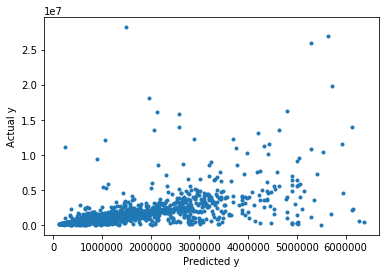

In [53]:
# Test R^2
print(model.score(X_test, y_actual))
plt.scatter(y_pred, y_actual, marker='.')
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
#plt.gca().set_aspect('equal') #set same scale for x and y
#plt.axis('equal')
plt.show()
#output not that useful here


In [48]:
for a, b in zip(y_pred, y_actual):
    print("Predicted = {0}, Actual = {1}".format(a, b))

Predicted = 310000.0, Actual = 296687.5
Predicted = 468500.0, Actual = 362000.0
Predicted = 447600.0, Actual = 406500.0
Predicted = 346450.0, Actual = 295000.0
Predicted = 391400.0, Actual = 480000.0
Predicted = 450750.0, Actual = 465000.0
Predicted = 325200.0, Actual = 335000.0
Predicted = 516990.0, Actual = 570000.0
Predicted = 352952.0, Actual = 397500.0
Predicted = 602500.0, Actual = 731250.0
Predicted = 398500.0, Actual = 475000.0
Predicted = 733600.0, Actual = 650000.0
Predicted = 491800.0, Actual = 500000.0
Predicted = 2523190.0, Actual = 415000.0
Predicted = 705550.0, Actual = 719000.0
Predicted = 514990.0, Actual = 518000.0
Predicted = 709800.0, Actual = 250000.0
Predicted = 887186.0, Actual = 857500.0
Predicted = 313480.0, Actual = 245000.0
Predicted = 185000.0, Actual = 166100.0
Predicted = 388750.0, Actual = 250000.0
Predicted = 392200.0, Actual = 248000.0
Predicted = 280700.0, Actual = 278997.5
Predicted = 202399.0, Actual = 177000.0
Predicted = 270000.0, Actual = 313500.0

Predicted = 512600.0, Actual = 495000.0
Predicted = 215099.0, Actual = 282000.0
Predicted = 479220.0, Actual = 576000.0
Predicted = 431695.0, Actual = 420500.0
Predicted = 543500.0, Actual = 767750.0
Predicted = 310758.0, Actual = 280000.0
Predicted = 587300.0, Actual = 628000.0
Predicted = 433500.0, Actual = 500000.0
Predicted = 712000.0, Actual = 520000.0
Predicted = 335400.0, Actual = 365000.0
Predicted = 595800.0, Actual = 720000.0
Predicted = 506000.0, Actual = 542500.0
Predicted = 653340.0, Actual = 750000.0
Predicted = 426050.0, Actual = 339999.5
Predicted = 356000.0, Actual = 120000.0
Predicted = 722245.0, Actual = 704500.0
Predicted = 544000.0, Actual = 590000.0
Predicted = 707252.0, Actual = 550000.0
Predicted = 217295.0, Actual = 230000.0
Predicted = 543990.0, Actual = 466000.0
Predicted = 362150.0, Actual = 350000.0
Predicted = 599000.0, Actual = 582500.0
Predicted = 245495.0, Actual = 225000.0
Predicted = 466250.0, Actual = 495000.0
Predicted = 415551.0, Actual = 355000.0


Predicted = 332000.0, Actual = 312500.0
Predicted = 1261250.0, Actual = 805000.0
Predicted = 242390.0, Actual = 225000.0
Predicted = 523900.0, Actual = 490000.0
Predicted = 358200.0, Actual = 327500.0
Predicted = 716100.0, Actual = 812500.0
Predicted = 238198.0, Actual = 282500.0
Predicted = 472000.0, Actual = 550000.0
Predicted = 349390.0, Actual = 451950.0
Predicted = 1058919.0, Actual = 789000.0
Predicted = 277100.0, Actual = 300000.0
Predicted = 613100.0, Actual = 661250.0
Predicted = 463100.0, Actual = 475000.0
Predicted = 926700.0, Actual = 1425000.0
Predicted = 315250.0, Actual = 345000.0
Predicted = 469500.0, Actual = 310000.0
Predicted = 683550.0, Actual = 635000.0
Predicted = 568075.0, Actual = 510000.0
Predicted = 2137100.0, Actual = 1230000.0
Predicted = 351746.0, Actual = 345000.0
Predicted = 431000.0, Actual = 273750.0
Predicted = 662500.0, Actual = 725000.0
Predicted = 560500.0, Actual = 547500.0
Predicted = 755550.0, Actual = 500000.0
Predicted = 240395.0, Actual = 2040

k=3
mean_squared_error(y_actual, y_pred) =1601106779995.6311
print(model.score(X_test, y_actual))=0.365012456468

k=5
mean_squared_error(y_actual, y_pred) =1513247374453.6899
print(model.score(X_test, y_actual))=0.399856873734

k=10 
mean_squared_error(y_actual, y_pred) =1525870415661.2219
print(model.score(X_test, y_actual))=0.394850658441

k=15
mean_squared_error(y_actual, y_pred) =1536606709712.6035
print(model.score(X_test, y_actual))=0.390592719784

In [1]:
list(zip(col_names, model.feature_importances_))

NameError: name 'col_names' is not defined